**Installation**

In [1]:
!pip install rouge-score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Libraries**

In [2]:
import nltk                             
import string
from nltk.tokenize import sent_tokenize
from rouge_score import rouge_scorer
import pandas as pd
import os
import numpy as np

**Necessary Downloads**

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
INPUT_PATH = "/content/drive/MyDrive/Semester 3 IIITD/NLP/NLP_Project/Dataset/preprocessed_data"

In [6]:
train_data = pd.read_csv(os.path.join(INPUT_PATH,"whole_dataset/train.csv"))
train_data.head()

,Heading,Summary,Article,id
0,india opposes china's belt and road initiative...,the name of all member countries except india ...,"at sco, india refuses to back china's belt and...",0
1,"un urges for maximum restraint, invokes simla ...","pakistan termed the indian action as ""unilater...","un chief invokes shimla agreement, calls for '...",1
2,"china, pak to finalise deal to develop sez und...","""the agreement will be finalised between khybe...","china, pak to finalise deal to develop sez und...",2
3,"covaxin effectively neutralises both alpha, de...",the top health research institute said that an...,"covaxin effectively neutralises both alpha, de...",3
4,"top white house officials buried cdc report, r...",the decision to shelve detailed advice from th...,"in this april 22, 2020, file photo president d...",4


**Main code**

In [7]:
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2'])

In [8]:
# return average of rouge 1 and rouge 2 f-measure for two sentences
def avg_rouge_score(sent1,sent2):
    r1 = scorer.score(sent1,sent2)['rouge1'].fmeasure
    r2 = scorer.score(sent1,sent2)['rouge2'].fmeasure
    return (r1 + r2)/2

In [9]:
# find rouge scores of doc with summary
def find_summary_sent(data):

    final_rouge_scores = []

    heading = data['Heading']
    article = data['Article']
    summary = data['Summary']

    for i in range(len(data)):
      heading_article = heading[i] + " " + article[i]
      summary_rouge = avg_rouge_score(heading_article,summary[i])
      final_rouge_scores.append(summary_rouge)

    dataset = data.copy(deep=True)
    dataset['rouge'] = final_rouge_scores

    return dataset

In [10]:
dataset = find_summary_sent(train_data)

In [11]:
dataset.head()

,Heading,Summary,Article,id,rouge
0,india opposes china's belt and road initiative...,the name of all member countries except india ...,"at sco, india refuses to back china's belt and...",0,0.027180
1,"un urges for maximum restraint, invokes simla ...","pakistan termed the indian action as ""unilater...","un chief invokes shimla agreement, calls for '...",1,0.187875
2,"china, pak to finalise deal to develop sez und...","""the agreement will be finalised between khybe...","china, pak to finalise deal to develop sez und...",2,0.163224
3,"covaxin effectively neutralises both alpha, de...",the top health research institute said that an...,"covaxin effectively neutralises both alpha, de...",3,0.089407
4,"top white house officials buried cdc report, r...",the decision to shelve detailed advice from th...,"in this april 22, 2020, file photo president d...",4,0.044008


In [12]:
dataset.shape

(10052, 5)

In [13]:
print("Min rouge score: ",dataset['rouge'].min())
print("Max rouge score: ",dataset['rouge'].max())

Min rouge score:  0.0
Max rouge score:  0.9127393225331369


In [14]:
len(dataset[dataset['rouge']==0])

2

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd2669b0c10>]],
      dtype=object)

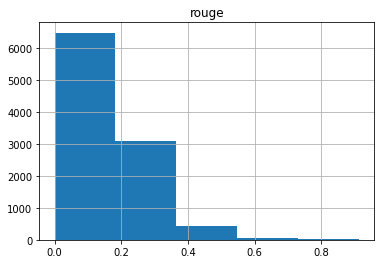

In [15]:
count = dataset['rouge']
pd.DataFrame(count).hist(bins=5)

In [16]:
def percentage_col(data, column, threshold):
    cnt = 0
    for i in data[column]:
        if(i <= threshold):
            cnt = cnt+1
    return (cnt/len(data[column]))

In [17]:
percentage_col(dataset, "rouge", 0.069)*100,"%"

(10.007958615200955, '%')

In [18]:
new_test_set = dataset[dataset['rouge'] <= 0.069].reset_index().drop(columns=['index','rouge'])
new_test_set.shape

(1006, 4)

In [19]:
new_train_set = dataset[dataset['rouge'] > 0.069].reset_index().drop(columns=['index','rouge'])
new_train_set.shape

(9046, 4)

In [20]:
PATH = "/content/drive/MyDrive/Semester 3 IIITD/NLP/NLP_Project/Dataset/preprocessed_data/divided_dataset"

In [21]:
new_train_set.to_csv(PATH+"/train.csv",index=False)
new_test_set.to_csv(PATH+"/test.csv",index=False)